In [2]:
import pandas as pd

data_path = '../data/Model-Comparison.xlsx'
data = pd.read_excel(data_path)

data.columns = ['Model', 'Metric'] + data.columns[2:].tolist()
data['Model'] = data['Model'].fillna(method='ffill')
data = data.melt(id_vars=['Model', 'Metric'], var_name='Records', value_name='Value')
data.head()

C:\Users\Doug\AppData\Local\Temp\ipykernel_33744\2464226272.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Model'] = data['Model'].fillna(method='ffill')


,Model,Metric,Records,Value
0,Linear Regression,Training Time,5000,0.583
1,Linear Regression,Inference Time,5000,0.000
2,Linear Regression,MSE,5000,6.628
3,Linear Regression,RMSE,5000,2.451
4,Linear Regression,MAE,5000,1.713


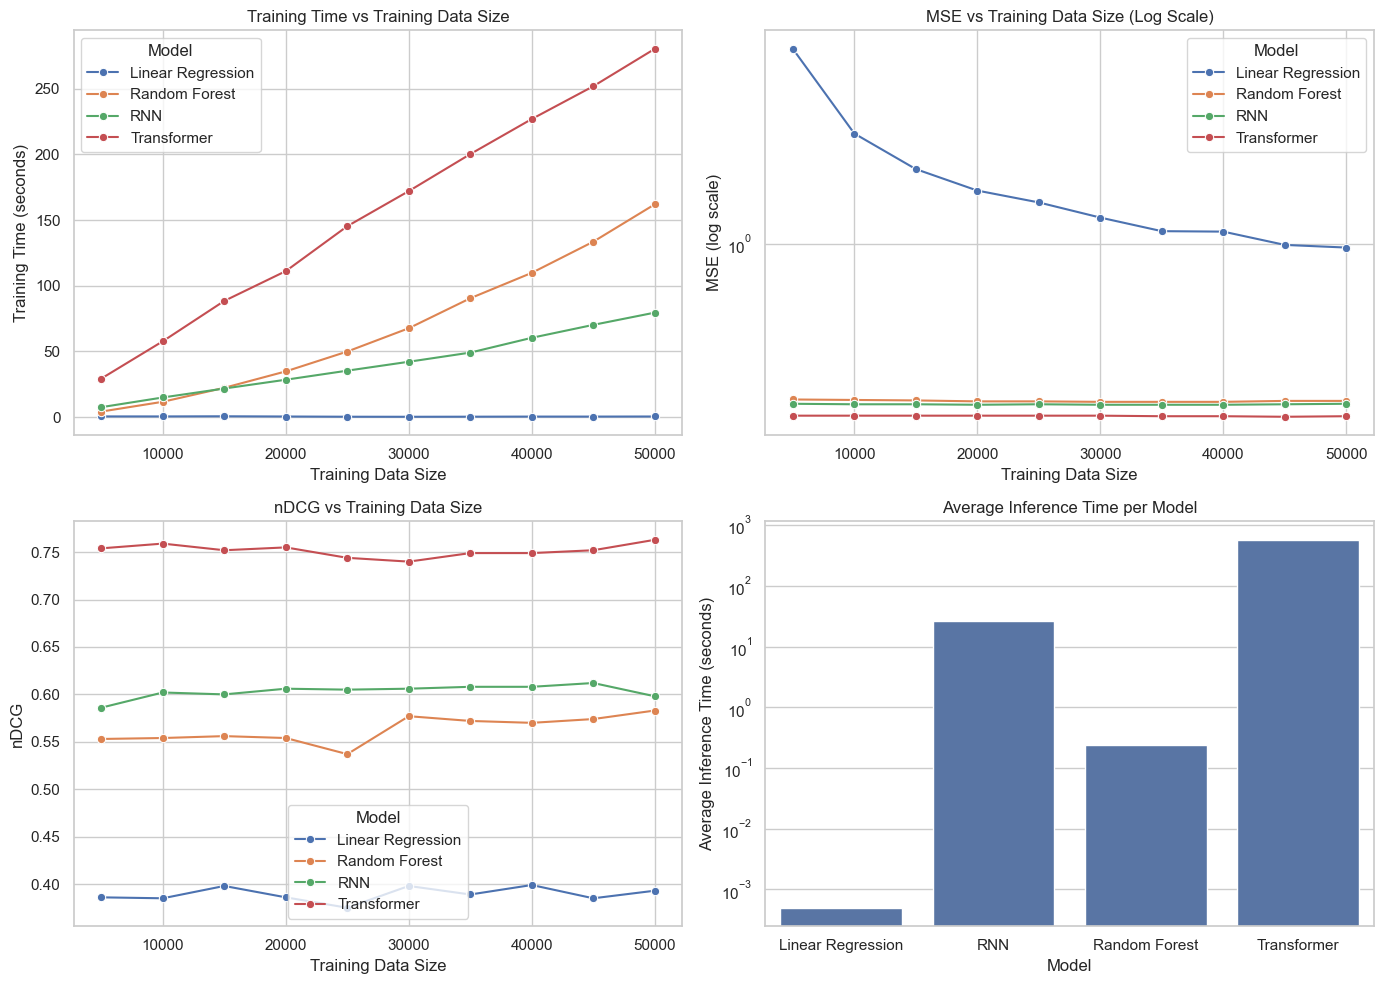

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Training time
sns.lineplot(data=data[data['Metric'] == 'Training Time'], x='Records', y='Value', hue='Model', ax=axes[0, 0], marker='o')
axes[0, 0].set_title('Training Time vs Training Data Size')
axes[0, 0].set_ylabel('Training Time (seconds)')
axes[0, 0].set_xlabel('Training Data Size')

# MSE
sns.lineplot(data=data[data['Metric'] == 'MSE'], x='Records', y='Value', hue='Model', ax=axes[0, 1], marker='o')
axes[0, 1].set_title('MSE vs Training Data Size (Log Scale)')
axes[0, 1].set_ylabel('MSE (log scale)')
axes[0, 1].set_xlabel('Training Data Size')
axes[0, 1].set_yscale('log')

# nDCG
sns.lineplot(data=data[data['Metric'] == 'nDCG'], x='Records', y='Value', hue='Model', ax=axes[1, 0], marker='o')
axes[1, 0].set_title('nDCG vs Training Data Size')
axes[1, 0].set_ylabel('nDCG')
axes[1, 0].set_xlabel('Training Data Size')

# Inference time
avg_inference_time = data[data['Metric'] == 'Inference Time'].groupby('Model')['Value'].mean().reset_index()
sns.barplot(data=avg_inference_time, x='Model', y='Value', ax=axes[1, 1])
axes[1, 1].set_title('Average Inference Time per Model')
axes[1, 1].set_ylabel('Average Inference Time (seconds)')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()